# Tarea 2

**Envío del PR inicial: 07.09.2018**

**Aceptación del PR: 14.09.2018**

## 1

Extiendan los operadores `+`, `-`, `*` y `/` para que funcionen cuando una de las dos entradas es un `Dual` y la otra es un `Real` (número cualquiera), sin importar el orden.

Es necesario cargar la definición del tipo `Dual` y las operaciones extendidas para este tipo desarrollado en el [notebook 3](https://github.com/lbenet/TSFisComp1/blob/master/notas_clase/03_DiferenciacionAutomatica.ipynb):

In [1]:
#Definición del tipo Dual.
# *Nota*: Se cambió el nombre del campo "diferencial" a algo que pueda escribir de manera más sencilla, de `  x′ ` a ` x´ ` (el apóstrofe usado).
"""
        Dual

    Definición de los números duales. Los campos internos son:

        x  :: Float64   # valor de la función
        x´ :: Float64   # valor de su derivada

"""
struct Dual
    x  :: Float64
    x´ :: Float64
end

In [2]:
# Funciones que convierten un real en un dual con cierto campo `x´`

Dual(c::Real) = Dual(c, 0.0)

dual(x0::Real) = Dual(x0, 1.0)

dual (generic function with 1 method)

In [3]:
# Extensión de algunas funciones básicas para operar con el tipo `Dual`

import Base: +, -, *, /, ^

+(u::Dual, v::Dual) = Dual( u.x + v.x, u.x´ + v.x´)

-(u::Dual, v::Dual) = Dual( u.x - v.x, u.x´ - v.x´)

*(u::Dual, v::Dual) = Dual( u.x * v.x, u.x * v.x´ + u.x´ * v.x)

function /(u::Dual, v::Dual)
    y = u.x / v.x
    Dual( y, (u.x´ - y * v.x´)/v.x )
end

function ^(a::Dual, n::Int)
    y = a.x^(n-1)
    Dual(a.x * y, n*y*a.x´)
end

^ (generic function with 63 methods)

Se puede entender a un real como una constante, por lo que su dual tiene campo `x'` cero.

In [4]:
# Para la suma:

+(a::Real, b::Dual) = Dual(a + b.x, b.x´)
+(a::Dual, b::Real) = Dual(a.x + b, a.x´)

# Para la diferencia:

-(a::Real, b::Dual) = Dual(a - b.x, b.x´)
-(a::Dual, b::Real) = Dual(a.x - b, a.x´)

# Para el producto:

*(a::Real, b::Dual) = Dual(a * b.x, a * b.x´)
*(a::Dual, b::Real) = Dual(a.x * b, a.x´ * b)

# Para el cociente:

/(a::Real, b::Dual) = Dual(a / b.x, (- (a/b.x) * b.x´)/b.x)
/(a::Dual, b::Real) = Dual(a.x / b, a.x´/b)

/ (generic function with 107 methods)

Una forma alternativa es definir las operaciones convirtiendo de antemano el real en un dual con campo `x'` igual a cero mediante el uso de la función `Dual` y usar las operaciones definidas con duales "puros".

## 2

Construyan 2 tests para cada una de las operaciones aritméticas definidas para los `Dual`es, incluyendo las que definieron en el ejercicio 1.

Para generar los tests, conviene hacerlos de forma que se puedan generar los que se desean. Esto se puede lograr haciendo los tests para números arbitrarios.

In [5]:
using Test

#### Duales puros (I):

In [6]:
a = 3
b = 4
c = π
d = 0
n = 5

5

Para la suma:

In [7]:
@test Dual(a, b) + Dual(c, d) == Dual(a + c, b + d)

Test Passed

Para la resta:

In [8]:
@test Dual(a, b) - Dual(c, d) == Dual(a - c, b - d)

Test Passed

Para la multiplicación:

In [9]:
@test Dual(a, b) * Dual(c, d) == Dual(a*c, a*d + c*b)

Test Passed

Para la división:

In [10]:
@test Dual(a, b) / Dual(c, d) == Dual(a/c, (b - (a/c)*d)/c)

Test Passed

Para las potencias:

In [11]:
@test Dual(a, b)^n == Dual(a^n, n*b*a^(n-1))

Test Passed

#### Duales y reales (I):

Se muestra en el primer comando una combinación y en el segundo la otra. Se usan los mismos valores que para la parte anterior.

Para la suma:

In [12]:
@test Dual(a, b) + c == Dual(a + c, b)

Test Passed

In [13]:
@test a + Dual(c, d) == Dual(a + c, d)

Test Passed

Para la resta:

In [14]:
@test Dual(a, b) - c == Dual(a - c, b)

Test Passed

In [15]:
@test a - Dual(c, d) == Dual(a - c, d)

Test Passed

Para la multiplicación:

In [16]:
@test a * Dual(c, d) == Dual(a*c, a*d)

Test Passed

In [17]:
@test Dual(a, b) * c == Dual(a*c, c*b)

Test Passed

Para la división:

In [18]:
@test Dual(a, b) / c == Dual(a/c, b/c)

Test Passed

In [19]:
@test a / Dual(c, d) == Dual(a/c, (- (a/c)*d)/c)

Test Passed

#### Duales puros (II):

In [20]:
a = 0
b = sqrt(2)
c = 2
d = 0.5
n = 10

10

Para la suma:

In [21]:
@test Dual(a, b) + Dual(c, d) == Dual(a + c, b + d)

Test Passed

Para la resta:

In [22]:
@test Dual(a, b) - Dual(c, d) == Dual(a - c, b - d)

Test Passed

Para la multiplicación:

In [23]:
@test Dual(a, b) * Dual(c, d) == Dual(a*c, a*d + c*b)

Test Passed

Para la división:

In [24]:
@test Dual(a, b) / Dual(c, d) == Dual(a/c, (b - (a/c)*d)/c)

Test Passed

Para las potencias:

In [25]:
@test Dual(a, b)^n == Dual(a^n, n*b*a^(n-1))

Test Passed

#### Duales y reales (II):

Se muestra en el primer comando una combinación y en el segundo la otra. Se usan los mismos valores que para la parte anterior.

Para la suma:

In [26]:
@test Dual(a, b) + c == Dual(a + c, b)

Test Passed

In [27]:
@test a + Dual(c, d) == Dual(a + c, d)

Test Passed

Para la resta:

In [28]:
@test Dual(a, b) - c == Dual(a - c, b)

Test Passed

In [29]:
@test a - Dual(c, d) == Dual(a - c, d)

Test Passed

Para la multiplicación:

In [30]:
@test a * Dual(c, d) == Dual(a*c, a*d)

Test Passed

In [31]:
@test Dual(a, b) * c == Dual(a*c, c*b)

Test Passed

Para la división:

In [32]:
@test Dual(a, b) / c == Dual(a/c, b/c)

Test Passed

In [33]:
@test a / Dual(c, d) == Dual(a/c, (- (a/c)*d)/c)

Test Passed

## 3

Sobrecarguen la función `show` (que está en Base) para que cuando se impriman los duales aparezcan con la notación $\varepsilon$ que usamos al principio de este notebook, por ejemplo, el resultado de `Dual(1,2)` debe ser parecido a `1.0 + 2.0 ε`.

La información para poder realizar este ejercicio se tomó de [esta página de la documentación](https://docs.julialang.org/en/v1/base/io-network) y [esta pregunta de uso de Julia](https://discourse.julialang.org/t/overload-show-for-array-of-custom-types/9589), así como la idea para mejorar la representación de los duales con campo `x´` se tomó del código de los compañeros [Uziel Linares y Paulina Martin](https://github.com/uzielnmtz/TSFisComp1/blob/pm_ul/Tarea2/tareas/PaulinaM_UzielL/Tarea2.ipynb).

In [34]:
function Base.show(io::IO, u::Dual)

    if (u.x´ < 0) | (u.x´ == -0.0)
        
        print(io, "$(u.x) - $(abs(u.x´)) ε")
        
    else
        
        print(io, "$(u.x) + $(u.x´) ε")
    end
end

In [35]:
u = Dual(1.0, -2.0)

1.0 - 2.0 ε

## 4

Obtengan la derivada de 
$$g(x) = \frac{3x^2-8x+5}{7x^3-1}$$
en $x_0=1$.

Como se puede inferir del texto de clase, se tiene que si $f$ es una función "apropiada":

$$f(x + x´\varepsilon) = f(x) + x´\varepsilon f'(x) + \mathcal{O}((x'\varepsilon)^2) $$

De dónde, como $\varepsilon^2 = 1$:

$$f(x + x´\varepsilon) = f(x) + x´\varepsilon f'(x). $$

Esto estrictamente es cierto sólo en el caso en el que $\varepsilon$ sea un diferencial, ya que en caso de ser un real estándar, la serie de Taylor en general no es exacta con sólo el término lineal.

De aquí se puede deducir que, tomando la parte "$\varepsilon$" (diferencial, $\text{dif}$) de la expresión (i.e. el campo `x´`):

$$ f'(x) = \frac{1}{x'} \text{dif } f(x + x'\varepsilon). $$

En el caso en el que $ \text{dif } (x + \varepsilon x´) = x' = 1$ (como la identidad):

$$ f'(x) = \text{dif } f(x + \varepsilon). $$

Esto permite definir:

In [36]:
"""
    derivada_dual(f, x0)

La función `derivada_dual` calcula la derivada numérica de la función `f` en el punto `x0` usando números duales.

# Argumentos

La función requiere que `f` sea una función definida para duales y que `x0` sea un número real.

# Ejemplos
´´´julia-repl
julia> derivada_dual(x -> x, 1)
1.0

julia> derivada_dual(x -> x^2, 1)
2.0
´´´
"""
function derivada_dual(f::Function, x0::Real)
    
    derivada_x0 = f(dual(x0)).x´
    
    return(derivada_x0)
end

derivada_dual (generic function with 1 method)

De dónde se puede calcular lo solicitado:

In [37]:
g(x) = (3*x^2 - 8*x + 5)/(7*x^3 - 1)

derivada_dual(g, 1)

-0.3333333333333333

Esta función no presentó problema alguno por las definiciones de suma, resta, producto, cociente y exponenciación natural de duales. (I.e. Julia ya "sabía" calcular con duales para dar un resultado dual para la función $g$.) El resultado es correcto dentro del épsilon de la máquina comparando con el [resultado analítico dado por Wolfram Alpha](https://m.wolframalpha.com/input/?i=D%5B%283*x%5E2+-+8*x+%2B+5%29%2F%287*x%5E3+-+1%29%2C+x%5D%2F.x-%3E1): $-1/3$


Sin embargo, hasta ahora no se han hecho extensiones de funciones trascendentes como las funciones trigonométricas:

In [38]:
derivada_dual(x -> sin(x), 0)

MethodError: MethodError: no method matching sin(::Dual)
Closest candidates are:
  sin(!Matched::BigFloat) at mpfr.jl:683
  sin(!Matched::Missing) at math.jl:1056
  sin(!Matched::Complex{Float16}) at math.jl:1005
  ...

## 5

- Recordando la regla de la cadena(!!!), extiendan el usar los `Dual` a las funciones `sqrt`, `exp`, `log`, `sin`, `cos`, `sinh` y `cosh`. 

- Muestren que las cosas dan los resultados que esperan usando pruebas como hicieron en el ejercicio 2.

- Calculen la derivada de $h(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$ en $x_0 = 2$. ¿Qué tan preciso es el resultado?(Pueden usar cualquier otra manera de obtener el resultado correcto, sólo tienen que ser claros en la explicación.)

- Dibujen, para $x_0 \in [1,5]$ la función $h'(x)$.

#### Extensión de funciones con duales y pruebas de las mismas:

La idea para extender los duales a funciones trascendentes es la misma que la usada para extender las funciones "básicas" usada de forma implícita al inicio y desarrollada en el ejercicio anterior: hacer un desarrollo de Taylor considerando que $\varepsilon^2 = 1$:

$$f(x + x´\varepsilon) = f(x) + x´\varepsilon f'(x). $$

In [39]:
import Base.sqrt

sqrt(u::Dual) = begin
   
    raíz = sqrt(u.x)
    valor = Dual(raíz, u.x´ / (2*raíz))
    
    return(valor)
end

sqrt (generic function with 20 methods)

In [40]:
sqrt(dual(4))

2.0 + 0.25 ε

In [41]:
a = 1
@test sqrt(dual(a)) == Dual(sqrt(a), 1/(2*sqrt(a)))

Test Passed

In [42]:
a = 10
@test sqrt(dual(a)) == Dual(sqrt(a), 1/(2*sqrt(a)))

Test Passed

In [43]:
import Base.exp

exp(u::Dual) = begin
   
    exponencial = exp(u.x)
    valor = Dual(exponencial, u.x´*exponencial)
    
    return(valor)
end

exp (generic function with 14 methods)

In [44]:
exp(dual(2))

7.38905609893065 + 7.38905609893065 ε

In [45]:
a = 0

@test exp(dual(a)) == Dual(exp(a), exp(a))

Test Passed

In [46]:
a = 1

@test exp(dual(a)) == Dual(exp(a), exp(a))

Test Passed

In [47]:
import Base.log

log(u::Dual) = begin
   
    valor = Dual(log(u.x), u.x´/u.x)
    
    return(valor)
end

log (generic function with 20 methods)

In [48]:
log(dual(2))

0.6931471805599453 + 0.5 ε

In [49]:
a = 1

@test log(dual(a)) == Dual(log(a), 1/a)

Test Passed

In [50]:
a = 10

@test log(dual(a)) == Dual(log(a), 1/a)

Test Passed

In [51]:
import Base.sin

sin(u::Dual) = begin
    
    valor = Dual(sin(u.x), u.x´*cos(u.x))
    return(valor)
end   

sin (generic function with 13 methods)

In [52]:
sin(dual(0))

0.0 + 1.0 ε

In [53]:
a = 0

@test sin(dual(a)) == Dual(sin(a), cos(a))

Test Passed

In [54]:
a = π

@test sin(dual(a)) == Dual(sin(a), cos(a))

Test Passed

In [55]:
import Base.cos

cos(u::Dual) = begin
    
    valor = Dual(cos(u.x), -u.x´*sin(u.x))
    return(valor)
end   

cos (generic function with 13 methods)

In [56]:
cos(dual(0))

1.0 - 0.0 ε

In [57]:
a = 0

@test cos(dual(a)) == Dual(cos(a), -sin(a))

Test Passed

In [58]:
a = π

@test cos(dual(a)) == Dual(cos(a), -sin(a))

Test Passed

In [59]:
import Base.sinh

sinh(u::Dual) = begin
    
    valor = Dual(sinh(u.x), u.x´*cosh(u.x))
    return(valor)
end   

sinh (generic function with 13 methods)

In [60]:
sinh(dual(0))

0.0 + 1.0 ε

In [61]:
a = 0

@test sinh(dual(a)) == Dual(sinh(a), cosh(a))

Test Passed

In [62]:
a = exp(1)

@test sinh(dual(a)) == Dual(sinh(a), cosh(a))

Test Passed

In [63]:
import Base.cosh

cosh(u::Dual) = begin
    
    valor = Dual(cosh(u.x), u.x´*sinh(u.x))
    return(valor)
end   

cosh (generic function with 13 methods)

In [64]:
cosh(dual(0))

1.0 - 0.0 ε

In [65]:
a = 0

@test cosh(dual(a)) == Dual(cosh(a), sinh(a))

Test Passed

In [66]:
a = exp(1)

@test cosh(dual(a)) == Dual(cosh(a), sinh(a))

Test Passed

#### Cálculo de la derivada de un ejemplo:

Sea $h(x) = \sin\Big(x^3 - \frac{2}{x^6}\Big)$, para calcular su derivada en $x_0 = 2$, basta usar la función definida anteriormente:

In [67]:
x0 = 2

h(x) = sin(x^3 - 2/(x^6))

h (generic function with 1 method)

In [68]:
hprime_numérica_x0 = derivada_dual(h, x0)

-1.384934905523464

La derivada de $h$ en ese punto, según [Wolfram Alpha](https://m.wolframalpha.com/input/?i=D%5BSin%5Bx%5E3+-+2%2Fx%5E6%5D%2C+x%5D%2F.+x-%3E2) es:

In [69]:
hprime_analítica_x0 = (387//32)cos(255//32)

-1.384934905523464

In [70]:
hprime_numérica_x0 == hprime_analítica_x0

true

Por lo que salvo la épsilon de la máquina, los resultados son los mismos.

Para poder comparar de mejor manera la derivada, conviene definir la función derivada numérica de $h$:

In [71]:
hprime_numérica(x) = derivada_dual(h, x)

hprime_numérica (generic function with 1 method)

Así como la derivada analítica, dada por [Wolfram Alpha](https://m.wolframalpha.com/input/?i=D%5BSin%5Bx%5E3+-+2%2Fx%5E6%5D%2C+x%5D), es:

In [72]:
hprime_analítica(x) = 3*(x^9 + 4)*cos((2-x^9)/x^6)/(x^7)

hprime_analítica (generic function with 1 method)

La comparación gráfica es:

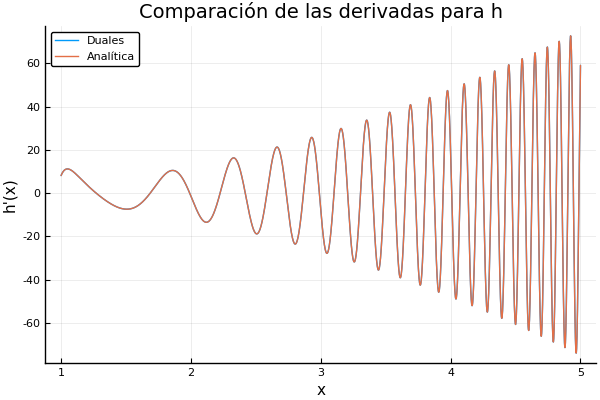

In [73]:
using Plots
pyplot() #GR tiene algunas fallas con Plots (https://github.com/JuliaPlots/Plots.jl/issues/1746)
rango = 1:0.001:5

gráfica_hprime = plot(rango, hprime_numérica, label = "Duales")
plot!(gráfica_hprime, rango, hprime_analítica, label = "Analítica", title = "Comparación de las derivadas para h", xlabel = "x", ylabel = "h'(x)")


Una gráfica rápida hace notar que en efecto sí hay dos gráficas distintas, aunque muy semejantes. Se observa una similaridad sorprendente:

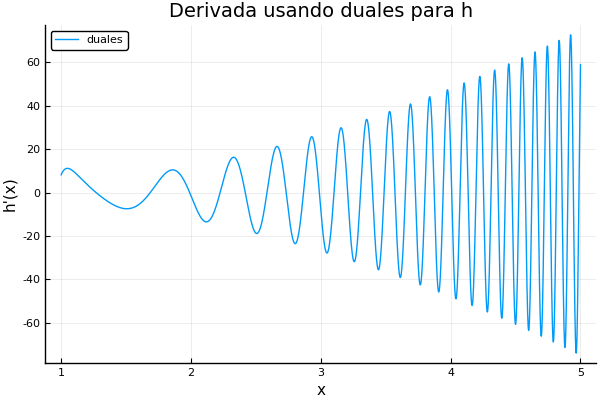

In [74]:
plot(rango, hprime_numérica, label = "duales", title = "Derivada usando duales para h", xlabel = "x", ylabel = "h'(x)")

## 6

Implementen el método de Newton para una función arbitraria $f(x)$ en una variable, explotando el uso de los `Dual`. 

- Obtengan, usando su función para el método de Newton, las raices del polinomio de Wilkinson 

$$
W_{6}(x) = (x-1)(x-2)(x-3)(x-4)(x-5)(x-6),
$$ 

usando como iterados iniciales $x_0=2.2$ y $x_0=2.45$.
    
- Hagan lo mismo que en el inciso anterior para $g(x) = x \sin(2x)$, con $x_0=0.7$.

Reimplementando el método de Newton:

In [75]:
"""
    newton(f, x0, número_iteraciones)

`newton` es una implementación unidimensional real del método de Newton para encontrar raíces de la función `f` para funciones extendidas para números duales.

# Argumentos

Para poder utilizar la función se requieren los siguientes argumentos:

* `f`, la función real de variable real de la que se quiere buscar una raíz (un punto \$ a \$ tales que \$ f(a) = 0 \$), que acepte números duales,
* `x0`, una adivinanza inicial sobre la posición de la raíz.

Opcionalmente, se puede especificar lo siguiente:

* `número_iteraciones`, el número de iteraciones a realizar. (Por defecto está configurado en 1000 iteraciones.)

`newton` requiere que `f` sea una función, que `x0` sea un real y que `número_iteraciones` sea un número entero. `x0`, en particular, siempre es convertida a un número flotante para mejorar la estabilidad de tipo.

# Ejemplos
```julia-repl
    julia> newton(x -> x^2 - 2, 2, 5)
    1.4142135623730951

    julia> newton(x -> x^2 - 2, 1.4, 100)
    1.414213562373095

    julia> newton(x -> x^2 - 2, MathConstants.φ, 1)
    1.4270509831248424

    julia> newton(x -> x^2 - 2, MathConstants.φ, 10)
    1.414213562373095
```
"""
function newton(f::Function, x0::Real, número_iteraciones::Int = 1000)
    
    fprime(x) = derivada_dual(f, x)
    punto_actual = float(x0)
    
    for i in 1:número_iteraciones
        punto_actual -= f(punto_actual)/fprime(punto_actual)
    end
    
    return(punto_actual)
end

newton (generic function with 2 methods)

Definiendo el polinomio de Wilkinson:

In [76]:
W₆(x) = (x-1)*(x-2)*(x-3)*(x-4)*(x-5)*(x-6)

W₆ (generic function with 1 method)

Y calculando lo solicitado:

In [77]:
x0 = 2.2
newton(W₆, x0)

2.0

In [78]:
x0 = 2.45
newton(W₆, x0)

6.0

Curiosamente, cambia de forma algo inesperada. [Este polinomio es usado para estudiar la dificultad de encontrar raíces ante cambios de coeficientes.](https://en.wikipedia.org/wiki/Wilkinson%27s_polynomial) Conviene graficar:

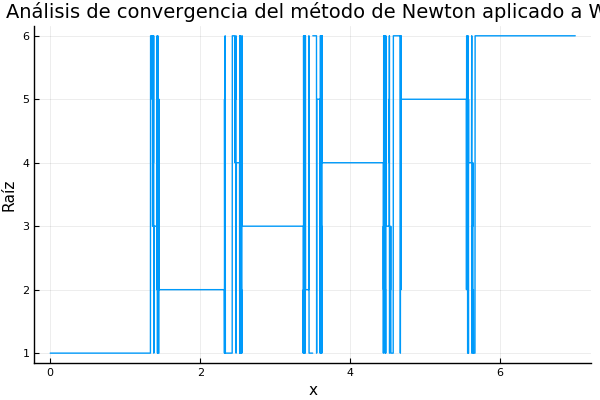

In [79]:
raíz_Wilkinson(x) = newton(W₆, x)

plot(0:0.001:7, raíz_Wilkinson, key = false, xlabel = "x", ylabel = "Raíz", title = "Análisis de convergencia del método de Newton aplicado a W6")

Se observa que en un intervalo en torno a las raíces ra raíz converge a dicha raíz, mientras que en puntos "intermedios", existe un comportamiento anómalo. 

Para el segundo inciso, definiendo $g_2(x) = x\sin(2x)$:

In [80]:
g₂(x) = x*sin(2*x)

g₂ (generic function with 1 method)

In [81]:
x0 = 0.7
newton(W₆, x0)

1.0

Por completitud, se hace un análisis similar de la convergencia para esta función:

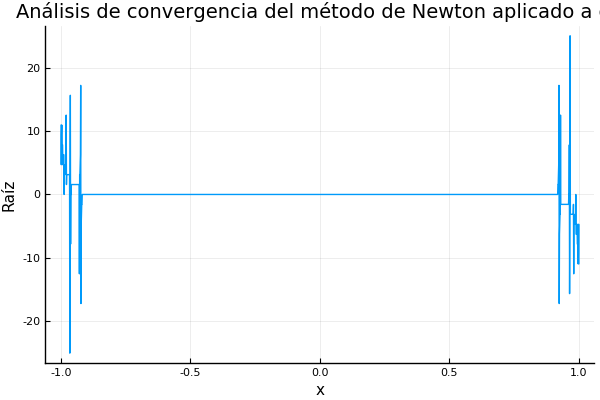

In [82]:
raíz_g₂(x) = newton(g₂, x)

plot(-1:0.001:1, raíz_g₂, key = false, xlabel = "x", ylabel = "Raíz", title = "Análisis de convergencia del método de Newton aplicado a g2")

Se observa que existe un intervalo "grande" en el que el método converge a la raíz en $x = 0$ y otro, antisimétrico, en el que la raíz obtenida oscila.

## 7

Argumenten qué podrían hacer para extender la idea de los `Dual` y calcular derivadas aún más altas. Como caso concreto, piensen en querer obtener la derivada 18 de funciones como las que hemos usado arriba

Una de las formas en la que se podría implementar esto para calcular derivadas $n$-ésimas, es observar lo que ocurre con el desarrollo de Taylor para la función:

$$ f(x + \varepsilon x') = f(x) + \varepsilon x' f'(x) + \frac{\varepsilon^2 x'}{2!}f''(x) + \frac{\varepsilon^3 x'}{3!}f'''(x) + \ldots .$$

Suponiendo, por ejemplo, que se desea la segunda derivada. Entonces conviene elimitar los términos de orden superior o igual al tercero. Solicitando que $\varepsilon^3 = 0$, se tiene:

$$ f(x + \varepsilon x') = f(x) + \varepsilon x' f'(x) + \frac{\varepsilon^2 x'}{2!}f''(x) .$$

En principio, esta regla ya otorga una forma de extender las funciones "básicas" al cálculo con números "2-duales", en los que un "2-dual" es una estructura con 3 campos: La parte real, la parte "(1-)diferencial" y la parte "2-diferencial" (los términos sin épsilon, con épsilon y con épsilon cuadrada repectivamente). Una vez dado esto, se puede definir una función `derivada_dual` que admita el orden de la derivada solicitada, la función dada y el punto a calcular. Esta función tomaría el punto, lo transforaría en un 2-dual con partes diferenciales uno y multiplicaría por $k!$ el campo $k$-ésimo diferencial, devolviendo la derivada solicitada. Sin embargo, esto se vuleve impracticable para órdenes superiores rápidamente de ya que requiere programar la acción de funciones comunes sobre "n-duales". Una forma de combatir esto sería haciendo con cuidado la extensión de reglas de potencias y de funciones con derivadas cíclicas.

En el caso para la derivada 18, se requeriría un 18-dual, con 19 campos con un número $\varepsilon$ tal que $\varepsilon^{19} = 0$, así como la extensión de las funciones a 18-duales. Una vez hecho esto, se tomaría el campo 19 de evaluar dicha función en el 18-dual con el punto de interés en la entrada real y unos en todas las demás, y multiplicar este número por 18!.

Una forma alternativa, pero aparentemente no generalizable a toda dimensión es usar [números de Grassman.](https://en.wikipedia.org/wiki/Grassmann_number)